In [1]:
!pip install --upgrade quantecon interpolation

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 6.0 MB/s eta 0:00:00


  Attempting uninstall: interpolation
    Found existing installation: interpolation 2.2.4
    Uninstalling interpolation-2.2.4:
      Successfully uninstalled interpolation-2.2.4



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe
import random as rd
from interpolation import interp

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabt

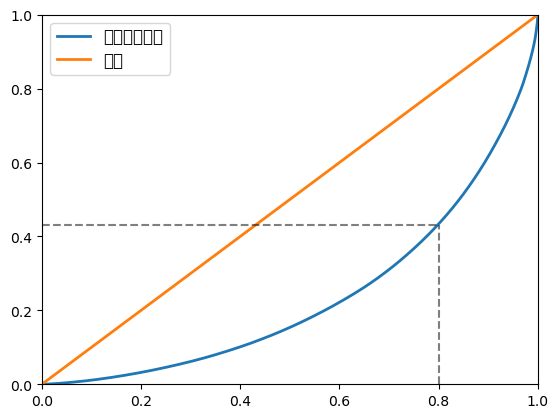

In [3]:
n = 2000
sample = np.exp(np.random.randn(n))

fig, ax = plt.subplots()

f_vals, l_vals = qe.lorenz_curve(sample)
ax.plot(f_vals, l_vals, label=f'对数正态样本', lw=2)
ax.plot(f_vals, f_vals, label='平等', lw=2)

ax.legend(fontsize=12)

ax.vlines([0.8], [0.0], [0.43], alpha=0.5, colors='k', ls='--')
ax.hlines([0.43], [0], [0.8], alpha=0.5, colors='k', ls='--')

ax.set_ylim((0, 1))
ax.set_xlim((0, 1))

plt.show()

In [4]:
url = 'https://media.githubusercontent.com/media/QuantEcon/high_dim_data/main/SCF_plus/SCF_plus_mini.csv'
df = pd.read_csv(url)
df = df.dropna()
df_income_wealth = df

In [5]:
df_income_wealth.head()

,year,n_wealth,t_income,l_income,weights,nw_groups,ti_groups
0,1950,266933.75,55483.027,0.0,0.998732,50-90%,50-90%
1,1950,87434.46,55483.027,0.0,0.998732,50-90%,50-90%
2,1950,795034.94,55483.027,0.0,0.998732,Top 10%,50-90%
3,1950,94531.78,55483.027,0.0,0.998732,50-90%,50-90%
4,1950,166081.03,55483.027,0.0,0.998732,50-90%,50-90%


In [6]:
df = df_income_wealth 

varlist = ['n_wealth',    # 净财富 
           't_income',    # 总收入
           'l_income']    # 劳动收入

years = df.year.unique()

# 创建列表来存储洛伦兹曲线数据

F_vals, L_vals = [], []

for var in varlist:
    # 创建列表来存储洛伦兹曲线数据
    f_vals = []
    l_vals = []
    for year in years:

        # 根据权重重复观测值
        counts = list(round(df[df['year'] == year]['weights'] )) 
        y = df[df['year'] == year][var].repeat(counts)
        y = np.asarray(y)
        
        # 打乱顺序以改进图像
        rd.shuffle(y)    
               
        # 计算并存储洛伦兹曲线数据
        f_val, l_val = qe.lorenz_curve(y)
        f_vals.append(f_val)
        l_vals.append(l_val)
        
    F_vals.append(f_vals)
    L_vals.append(l_vals)

f_vals_nw, f_vals_ti, f_vals_li = F_vals
l_vals_nw, l_vals_ti, l_vals_li = L_vals

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20928 (\N{CJK UNIFIED IDEOGRAPH-51C0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36130 (\N{CJK UNIFIED IDEOGRAPH-8D22}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23500 (\N{CJK UNIFIED IDEOGRAPH-5BCC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabt

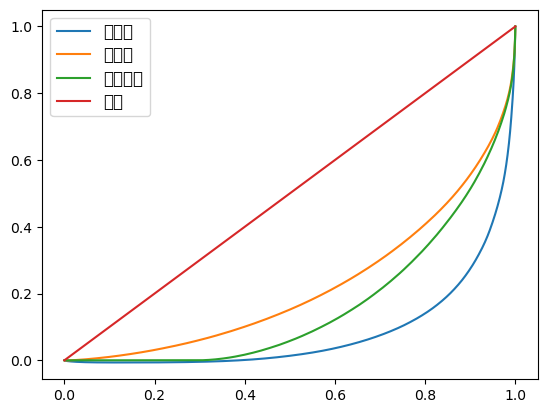

In [7]:
fig, ax = plt.subplots()

ax.plot(f_vals_nw[-1], l_vals_nw[-1], label=f'净财富')
ax.plot(f_vals_ti[-1], l_vals_ti[-1], label=f'总收入')
ax.plot(f_vals_li[-1], l_vals_li[-1], label=f'劳动收入')
ax.plot(f_vals_nw[-1], f_vals_nw[-1], label=f'平等')

ax.legend(fontsize=12)   
plt.show()

Font 'default' does not have a glyph for '\u9634' [U+9634], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5f71' [U+5f71], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u9762' [U+9762], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u79ef' [U+79ef], substituting with a dummy symbol.


/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabt

Font 'default' does not have a glyph for '\u5f71' [U+5f71], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u9762' [U+9762], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u79ef' [U+79ef], substituting with a dummy symbol.


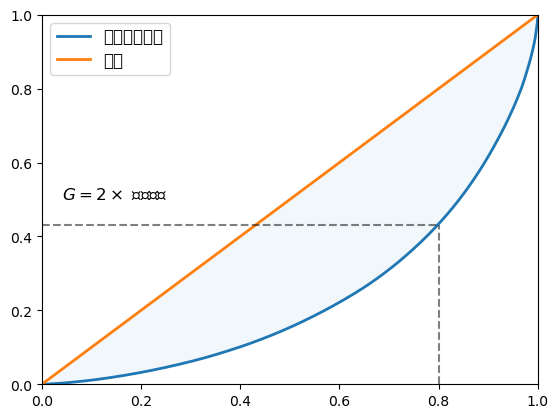

In [8]:
fig, ax = plt.subplots()

f_vals, l_vals = qe.lorenz_curve(sample)
ax.plot(f_vals, l_vals, label=f'对数正态样本', lw=2)
ax.plot(f_vals, f_vals, label='平等', lw=2)

ax.legend(fontsize=12)

ax.vlines([0.8], [0.0], [0.43], alpha=0.5, colors='k', ls='--')
ax.hlines([0.43], [0], [0.8], alpha=0.5, colors='k', ls='--')

ax.fill_between(f_vals, l_vals, f_vals, alpha=0.06)

ax.set_ylim((0, 1))
ax.set_xlim((0, 1))

ax.text(0.04, 0.5, r'$G = 2 \times$ 阴影面积', fontsize=12)
  
plt.show()

In [9]:
qe.gini_coefficient(sample)

0.5247212284754145

In [10]:
k = 5
σ_vals = np.linspace(0.2, 4, k)
n = 2_000

ginis = []

for σ in σ_vals:
    μ = -σ**2 / 2
    y = np.exp(μ + σ * np.random.randn(n))
    ginis.append(qe.gini_coefficient(y))

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23612 (\N{CJK UNIFIED IDEOGRAPH-5C3C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


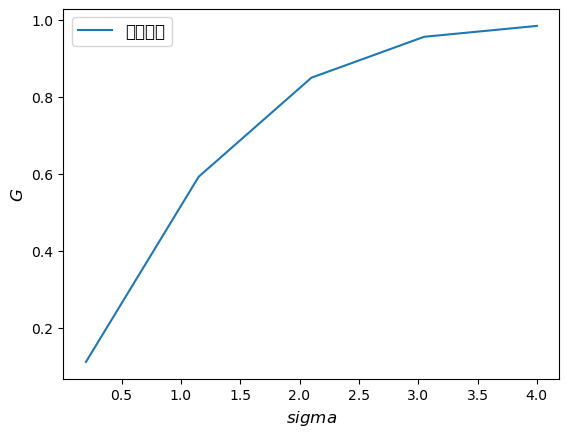

In [11]:
fig, ax = plt.subplots()

ax.plot(σ_vals, ginis, label='基尼系数')

ax.legend(fontsize=12)

ax.set_xlabel('$sigma$', fontsize=12)
ax.set_ylabel('$G$', fontsize=12)

plt.show()

In [12]:
def gini_coeff_vs_sigma(σ_vals, n=2_000):
    """
    给定不同行参数值后计算基尼系数
    """

    ginis = []

    for σ in σ_vals:
        μ = -σ**2 / 2  # 设定均值恒定
        y = np.exp(μ + σ * np.random.randn(n))
        ginis.append(qe.gini_coefficient(y))
    
    return ginis

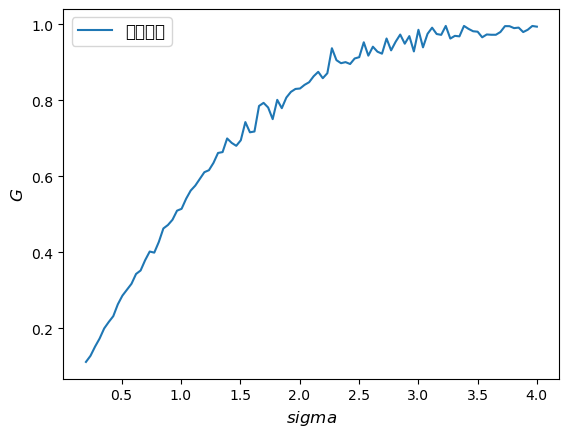

In [13]:
σ_vals = np.linspace(0.2, 4, 100)
ginis = gini_coeff_vs_sigma(σ_vals)

fig, ax = plt.subplots()

ax.plot(σ_vals, ginis, label='基尼系数')

ax.legend(fontsize=12)

ax.set_xlabel('$sigma$', fontsize=12)
ax.set_ylabel('$G$', fontsize=12)

plt.show()

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


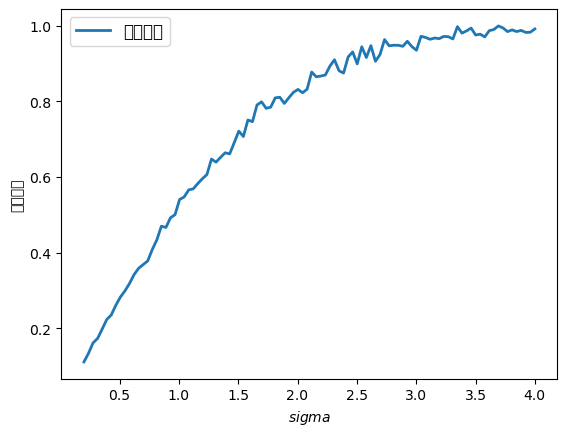

In [14]:
def plot_inequality_measures(x_vals, y_vals, label, x_label, y_label):
    fig, ax = plt.subplots()
    ax.plot(x_vals, y_vals, label=f'{label}数据', lw=2)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(fontsize=12)
    plt.show()

σ_vals = np.linspace(0.2, 4, 100)
ginis = gini_coeff_vs_sigma(σ_vals)

plot_inequality_measures(σ_vals, 
                         ginis, 
                         '模拟', 
                         '$sigma$', 
                         '基尼系数')

In [15]:
varlist = ['n_wealth',   # 净财富 
           't_income',   # 总收入
           'l_income']   # 劳动收入

df = df_income_wealth

# 创建列表来存储每个不平等度量的基尼系数

Ginis = []

for var in varlist:
    # 创建列表来存储基尼系数
    ginis = []
    
    for year in years:
        # 根据权重重复观测值
        counts = list(round(df[df['year'] == year]['weights'] ))
        y = df[df['year'] == year][var].repeat(counts)
        y = np.asarray(y)
        
        rd.shuffle(y)    # 打乱顺序
        
        # 计算并存储基尼系数
        gini = qe.gini_coefficient(y)
        ginis.append(gini)
        
    Ginis.append(ginis)

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20928 (\N{CJK UNIFIED IDEOGRAPH-51C0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36130 (\N{CJK UNIFIED IDEOGRAPH-8D22}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23500 (\N{CJK UNIFIED IDEOGRAPH-5BCC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabt

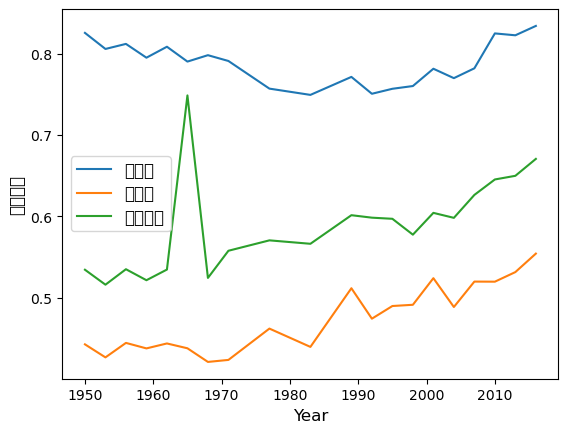

In [16]:
ginis_nw, ginis_ti, ginis_li = Ginis

fig, ax = plt.subplots()

ax.plot(years, ginis_nw, label=f'净财富')
ax.plot(years, ginis_ti, label=f'总收入')
ax.plot(years, ginis_li, label=f'劳动收入')

ax.legend(fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('基尼系数', fontsize=12)

plt.show()

In [17]:
# 用平均值替换劳动收入基尼的一个异常值
ginis_li_new = ginis_li
ginis_li_new[5] = (ginis_li[4] + ginis_li[6]) / 2

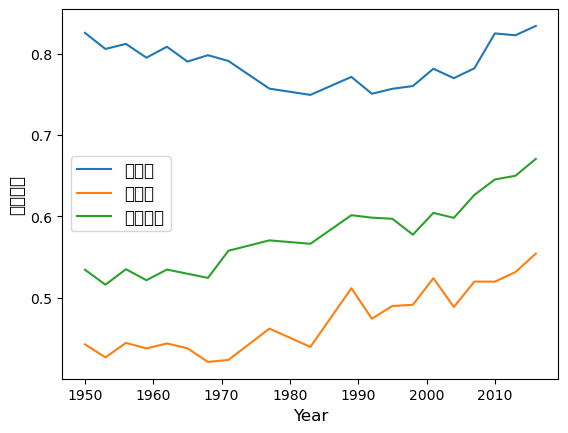

In [18]:
fig, ax = plt.subplots()

ax.plot(years, ginis_nw, label=f'净财富')
ax.plot(years, ginis_ti, label=f'总收入')
ax.plot(years, ginis_li_new, label=f'劳动收入')

ax.legend(fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('基尼系数', fontsize=12)

plt.show()

In [19]:
# 将调查权重从绝对值转换为相对值
df1 = df_income_wealth
df2 = df1.groupby('year').sum(numeric_only=True).reset_index()
df3 = df2[['year', 'weights']]
df3.columns = 'year', 'r_weights'
df4 = pd.merge(df3, df1, how="left", on=["year"])
df4['r_weights'] = df4['weights'] / df4['r_weights']

# 创建加权净财富、总收入、劳动收入

df4['weighted_n_wealth'] = df4['n_wealth'] * df4['r_weights']
df4['weighted_t_income'] = df4['t_income'] * df4['r_weights']
df4['weighted_l_income'] = df4['l_income'] * df4['r_weights']

# 提取按净财富和总收入前10%分组的两个群体

df6 = df4[df4['nw_groups'] == 'Top 10%']
df7 = df4[df4['ti_groups'] == 'Top 10%']

# 计算按净财富、总收入和劳动收入加权的前10%之和

df5 = df4.groupby('year').sum(numeric_only=True).reset_index()
df8 = df6.groupby('year').sum(numeric_only=True).reset_index()
df9 = df7.groupby('year').sum(numeric_only=True).reset_index()

df5['weighted_n_wealth_top10'] = df8['weighted_n_wealth']
df5['weighted_t_income_top10'] = df9['weighted_t_income']
df5['weighted_l_income_top10'] = df9['weighted_l_income']

# 计算这三个变量的前10%份额

df5['topshare_n_wealth'] = df5['weighted_n_wealth_top10'] / \
    df5['weighted_n_wealth']
df5['topshare_t_income'] = df5['weighted_t_income_top10'] / \
    df5['weighted_t_income']
df5['topshare_l_income'] = df5['weighted_l_income_top10'] / \
    df5['weighted_l_income']

# 我们只需要这些变量用于前10%份额
df_topshares = df5[['year', 'topshare_n_wealth',
                    'topshare_t_income', 'topshare_l_income']]

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'default' does not have a glyph for '\u9876' [U+9876], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5c42' [U+5c42], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4efd' [U+4efd], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u989d' [U+989d], substituting with a dummy symbol.


/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21171 (\N{CJK UNIFIED IDEOGRAPH-52B3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabt

Font 'default' does not have a glyph for '\u5c42' [U+5c42], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4efd' [U+4efd], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u989d' [U+989d], substituting with a dummy symbol.


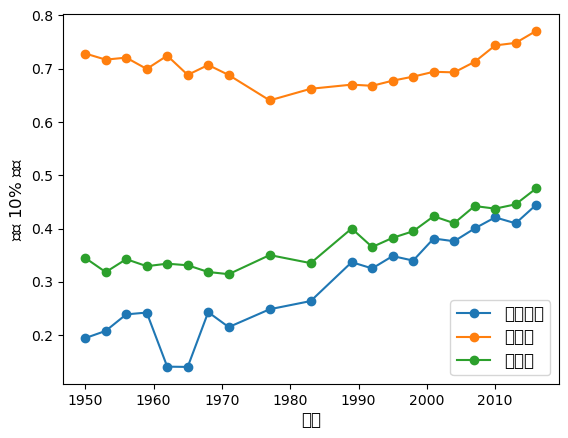

In [20]:
xlabel = "年份"
ylabel = "顶层 $10\%$ 份额"

fig, ax = plt.subplots()

ax.plot(years, df_topshares["topshare_l_income"],
        marker='o', label="劳动收入")
ax.plot(years, df_topshares["topshare_n_wealth"],
        marker='o', label="净财富")
ax.plot(years, df_topshares["topshare_t_income"],
        marker='o', label="总收入")

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)

ax.legend(fontsize=12)
plt.show()

In [21]:
def calculate_top_share(s, p=0.1):
    
    s = np.sort(s)
    n = len(s)
    index = int(n * (1 - p))
    return s[index:].sum() / s.sum()

Font 'default' does not have a glyph for '\u6807' [U+6807], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u51c6' [U+51c6], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5dee' [U+5dee], substituting with a dummy symbol.


/tmp/ipykernel_3396162/883894085.py:33: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3396162/883894085.py:33: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3396162/883894085.py:33: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3396162/883894085.py:33: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3396162/883894085.py:33: UserWarning: Glyph 23612 (\N{CJK UNIFIED IDEOGRAPH-5C3C}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3396162/883894085.py:33: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3396162/883894085.py:33: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.

Font 'default' does not have a glyph for '\u6807' [U+6807], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u51c6' [U+51c6], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5dee' [U+5dee], substituting with a dummy symbol.


/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23612 (\N{CJK UNIFIED IDEOGRAPH-5C3C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabt

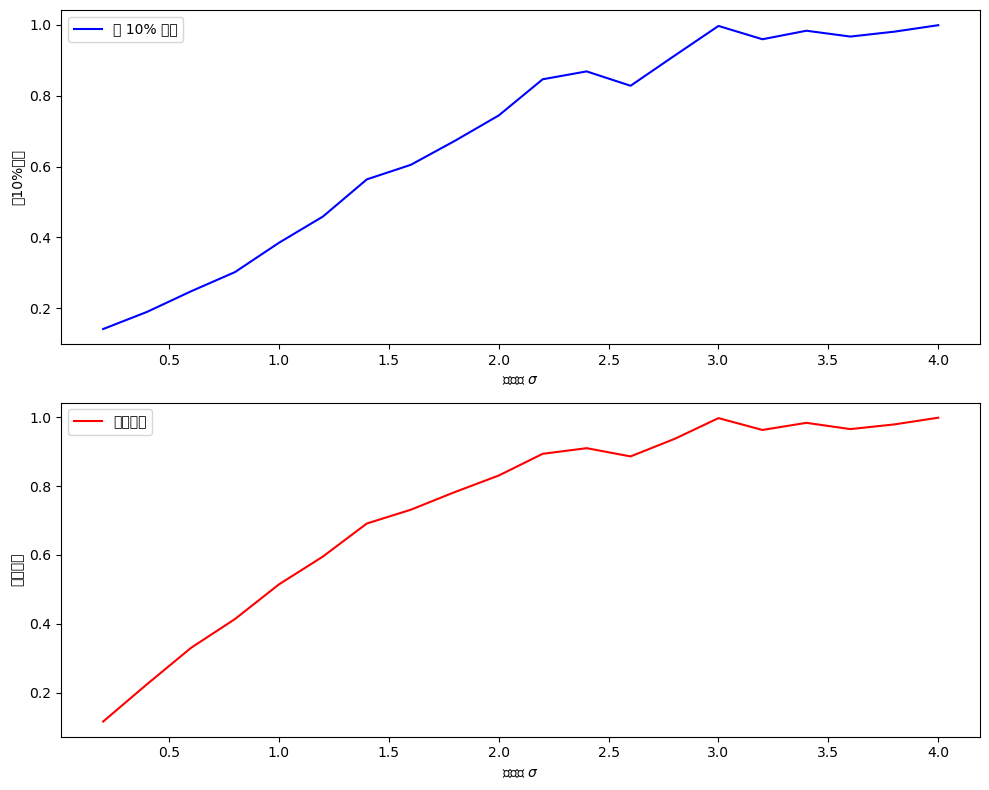

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import quantecon as qe

# 定义参数
sigma_vals = np.linspace(0.2, 4, 20)
p = 0.1
n = 2000

top_shares = []
gini_coeffs = []

# 进行仿真
for sigma in sigma_vals:
    mu = -sigma**2 / 2
    w_sigma = np.exp(mu + sigma * np.random.randn(n))
    top_shares.append(calculate_top_share(w_sigma, p=p))
    gini_coeffs.append(qe.gini_coefficient(w_sigma))

# 生成图表
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(sigma_vals, top_shares, 'b-', label=f"前 {int(p*100)}% 份额")
ax[0].set_xlabel("标准差 $\sigma$")
ax[0].set_ylabel("前10%份额")
ax[0].legend()

ax[1].plot(sigma_vals, gini_coeffs, 'r-', label="基尼系数")
ax[1].set_xlabel("标准差 $\sigma$")
ax[1].set_ylabel("基尼系数")
ax[1].legend()

plt.tight_layout()
plt.show()

In [23]:
k = 5
σ_vals = np.linspace(0.2, 4, k)
n = 2_000

topshares = []
ginis = []
f_vals = []
l_vals = []

for σ in σ_vals:
    μ = -σ ** 2 / 2
    y = np.exp(μ + σ * np.random.randn(n))
    f_val, l_val = qe._inequality.lorenz_curve(y)
    f_vals.append(f_val)
    l_vals.append(l_val)
    ginis.append(qe._inequality.gini_coefficient(y))
    topshares.append(calculate_top_share(y))

Font 'default' does not have a glyph for '\u9876' [U+9876], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5c42' [U+5c42], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4efd' [U+4efd], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u989d' [U+989d], substituting with a dummy symbol.


/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20223 (\N{CJK UNIFIED IDEOGRAPH-4EFF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'default' does not have a glyph for '\u9876' [U+9876], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5c42' [U+5c42], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4efd' [U+4efd], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u989d' [U+989d], substituting with a dummy symbol.


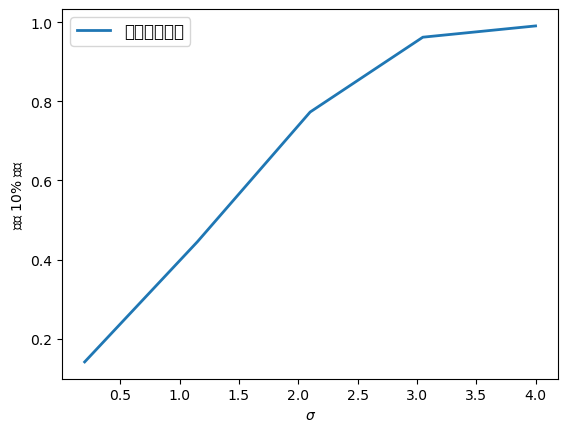

In [24]:
plot_inequality_measures(σ_vals, 
                         topshares, 
                         "仿真数据", 
                         "$\sigma$", 
                         "顶层 $10\%$ 份额") 

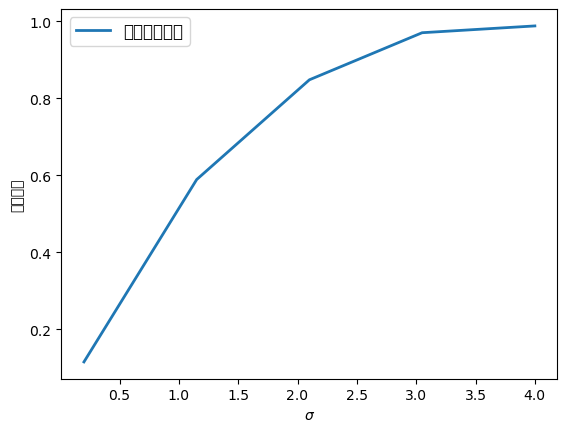

In [25]:
plot_inequality_measures(σ_vals, 
                         ginis, 
                         "仿真数据", 
                         "$\sigma$", 
                         "基尼系数") 

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31561 (\N{CJK UNIFIED IDEOGRAPH-7B49}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


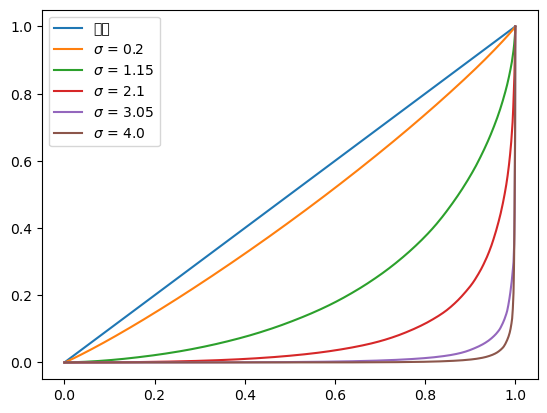

In [26]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], label=f"平等")
for i in range(len(f_vals)):
    ax.plot(f_vals[i], l_vals[i], label=f"$\sigma$ = {σ_vals[i]}")
plt.legend()
plt.show()

In [27]:
def lorenz2top(f_val, l_val, p=0.1):
    t = lambda x: interp(f_val, l_val, x)
    return 1- t(1 - p)

In [28]:
top_shares_nw = []
for f_val, l_val in zip(f_vals_nw, l_vals_nw):
    top_shares_nw.append(lorenz2top(f_val, l_val))

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'default' does not have a glyph for '\u9876' [U+9876], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5c42' [U+5c42], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4efd' [U+4efd], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u989d' [U+989d], substituting with a dummy symbol.


/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20928 (\N{CJK UNIFIED IDEOGRAPH-51C0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36130 (\N{CJK UNIFIED IDEOGRAPH-8D22}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23500 (\N{CJK UNIFIED IDEOGRAPH-5BCC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36817 (\N{CJK UNIFIED IDEOGRAPH-8FD1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabt

Font 'default' does not have a glyph for '\u5c42' [U+5c42], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4efd' [U+4efd], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u989d' [U+989d], substituting with a dummy symbol.


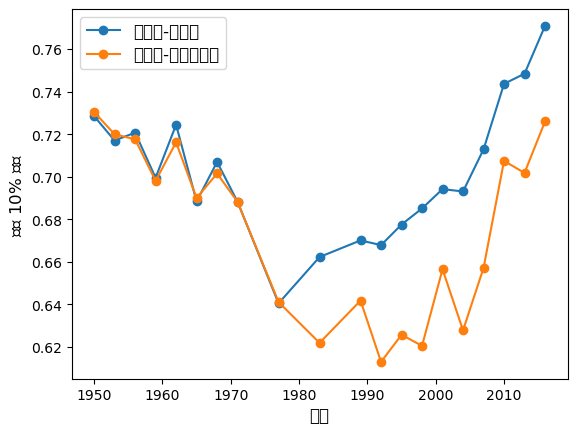

In [29]:
xlabel = "年份"
ylabel = "顶层 $10\%$ 份额"

fig, ax = plt.subplots()

ax.plot(years, df_topshares["topshare_n_wealth"], marker='o',\
   label="净财富-近似值")
ax.plot(years, top_shares_nw, marker='o', label="净财富-洛伦兹曲线")

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)

ax.legend(fontsize=12)
plt.show()